In [2]:
import os, numpy as np, gc, seaborn as sns
from scipy.stats import spearmanr, pearsonr, rankdata
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas as pd

def combine_train_test(train_file, test_file, combined_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    
    combined_data.to_csv(combined_file, index=False)

In [4]:
#FOR fireport data
train_file_path = "ThermoMPNN/data_all/training/fireprot_train.csv"
test_file_path = "ThermoMPNN/data_all/testing/fireprot_test.csv"

combined_file_path = "fireprot_data.csv"

combine_train_test(train_file_path, test_file_path, combined_file_path)

In [5]:
#FOR mega data
train_file_path = "ThermoMPNN/data_all/training/mega_train.csv"
test_file_path = "ThermoMPNN/data_all/testing/mega_test.csv"

combined_file_path = "mega_data.csv"

combine_train_test(train_file_path, test_file_path, combined_file_path)

In [6]:
df_fireprot = pd.read_csv("fireprot_data.csv")
pd.set_option('display.max_columns', 100)
df_fireprot.head(10)

,Unnamed: 0.1,Unnamed: 0,experiment_id,protein_name,uniprot_id,pdb_id,chain,position,wild_type,mutation,ddG,dTm,is_curated,type,derived_type,interpro_families,conservation,is_essential,correlated_positions,is_back_to_consensus,secondary_structure,asa,is_in_catalytic_pocket,is_in_tunnel_bottleneck,b_factor,method,method_details,technique,technique_details,pH,tm,notes,publication_doi,publication_pubmed,hsw_job_id,datasets,sequence,pdb_id_corrected,dupe_detector,pdb_position,pdb_sequence,oligomeric_state,structure_method,resolution
0,0,23,LL000714,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,A,-0.14,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-A-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
1,1,24,LL000715,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,D,-0.38,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-D-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
2,2,25,LL000716,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,E,-0.64,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-E-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
3,3,26,LL000717,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,F,-1.14,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-F-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
4,4,27,LL000718,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,G,-0.30,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-G-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
5,5,28,LL000719,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,H,-0.67,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-H-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
6,6,29,LL000720,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,I,-0.43,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,plate-based chemical denaturation assay,NaN,NaN,NaN,6.5,NaN,NaN,10.1073/pnas.1903888116,31371509.0,2i1nqi,NaN,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,1PGA,1PGA-I-0-M-P06654,0,MTYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,monomer,x-ray diffraction,NaN
7,7,30,LL000721,Immunoglobulin G-binding protein G,P06654,1PGA|1EM7|2GB1,A,1,M,K,-0.27,NaN,True,NaN,NaN,IPR000724|IPR005877|IPR009063|IPR019931|IPR019...,9.0,False,NaN,False,L,126.12,False,False,16.83,pl

In [10]:
len(df_fireprot)

2985

/var/folders/6t/_ldjjf3d1qdftmtpdlzd483m0000gq/T/ipykernel_46907/1732347470.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


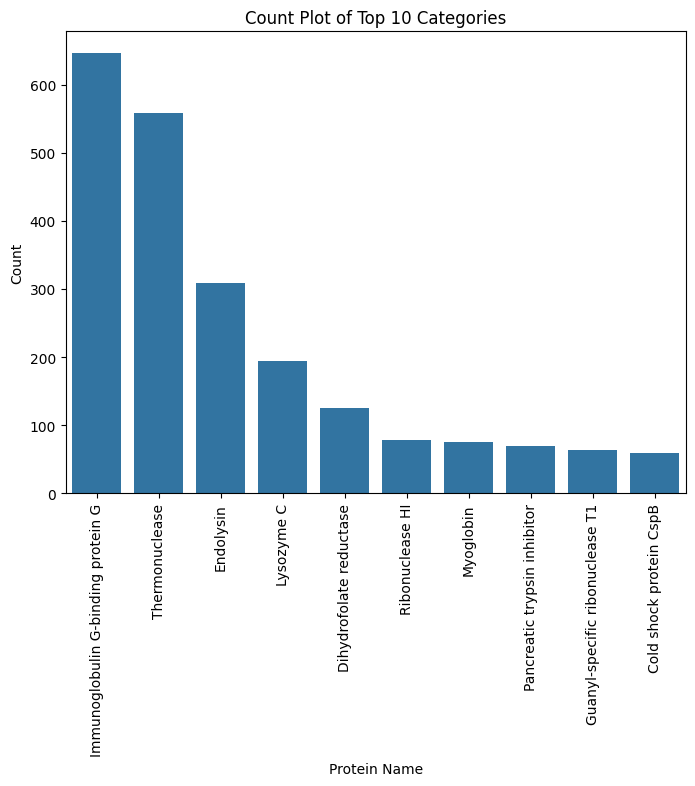

In [14]:
top_categories = df_fireprot['protein_name'].value_counts().nlargest(10).index

df_top10 = df_fireprot[df_fireprot['protein_name'].isin(top_categories)]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='protein_name', data=df_top10, order=top_categories)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Top 10 Protein name')
plt.xlabel('Protein Name')
plt.ylabel('Count')
plt.show()

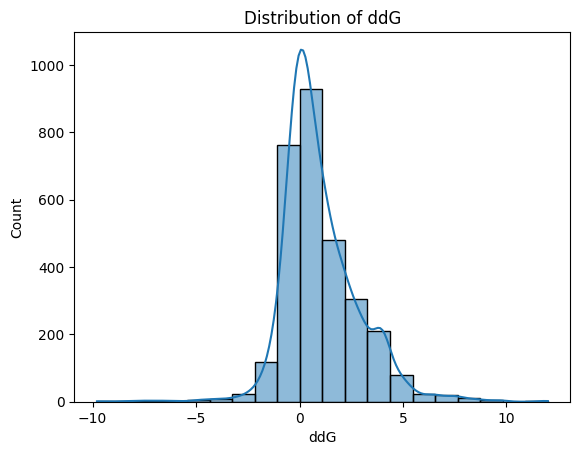

In [6]:
sns.histplot(df_fireprot['ddG'], bins=20, kde=True)
plt.title('Distribution of ddG')
plt.show()

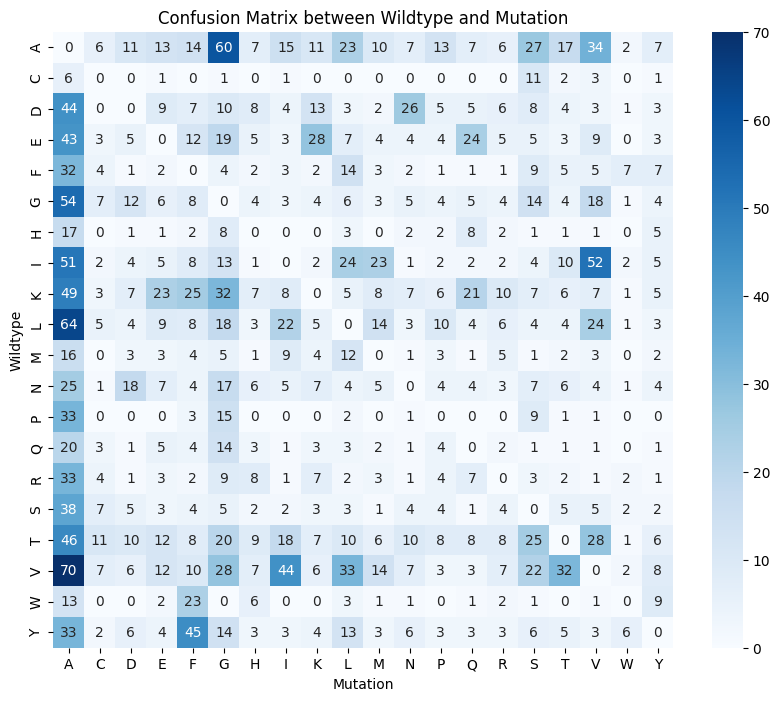

In [36]:
confusion_matrix = pd.crosstab(df_fireprot['wild_type'], df_fireprot['mutation'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix between Wildtype and Mutation')
plt.xlabel('Mutation')
plt.ylabel('Wildtype')
plt.show()